<a href="https://colab.research.google.com/github/nurfnick/Cantrell_Jackson/blob/master/types_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pa
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from google.colab import files
import plotly.graph_objects as go
import math
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import plotly.express as px

In [0]:
url = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/Support-Oct18-Sept19.csv'
url2 = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/HS_Invoiced_Customer_Total.csv'
url3 = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/Invoice_totals_month.csv'

In [0]:
df1 = pa.read_csv(url)
df2 = pa.read_csv(url2)
df3 = pa.read_csv(url3)

In [0]:
custs = sorted(list(set(df1['HS Customer'].values.tolist())))
calist = []
for c in range(len(custs)):
  calist.append(len(df1[df1['HS Customer']== custs[c]]))


In [0]:
tolcusts = sorted(list(set(df2['hs_customer_id'].values.tolist())))
totals = df2['Total '].values.tolist()
tlist = []
tc = 0

for c in range(len(custs)):
  if custs[c] in tolcusts:
    tlist.append(totals[tc])
  else:
    tc = tc - 1
    tlist.append('NA')
  tc = tc + 1

ntlist = []
for t in range(len(tlist)):
  if tlist[t] == 'NA':
    nt = 0
    ntlist.append(nt)
  else:
    nt = int(tlist[t])
    ntlist.append(nt)

In [0]:
print(custs)

[4, 5, 10, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 28, 34, 37, 39, 40, 41, 45]


In [6]:
types = set(df1['Type'].values.tolist())
types = list(types)
types = list(types[1:])

toltypes = []
for c in range(len(custs)):
  df = df1[df1['HS Customer']==custs[c]]
  for t in range(len(types)):
    tol = len(df[df["Type"]==types[t]])
    toltypes.append(tol)

print(types)
print(toltypes)

['Feature Request', 'Software Problem / Issue', 'General Question', 'Data Entry Support', 'Positive Feedback', 'Problem / Issue']
[0, 3, 0, 0, 0, 0, 3, 4, 4, 1, 0, 0, 0, 9, 2, 1, 0, 0, 3, 2, 2, 12, 0, 0, 1, 2, 1, 1, 0, 0, 5, 71, 39, 2, 0, 2, 2, 2, 4, 1, 0, 0, 2, 6, 5, 1, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 3, 0, 0, 2, 6, 6, 1, 0, 0, 2, 0, 0, 8, 0, 0, 0, 8, 3, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 7, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 3, 4, 1, 1, 0, 0, 3, 2, 0, 0, 0]


In [7]:
numtypes = []
for t in range(len(types)):
  t = len(df1[df1['Type']==types[t]])
  numtypes.append(t)

print(numtypes)

[27, 130, 80, 37, 1, 3]


In [8]:
custype = []
start = 0
end = 6
for c in range(len(custs)):
  l = toltypes[start:end]
  custype.append(l)
  start = start + 6
  end = end + 6

print(custype)

[[0, 3, 0, 0, 0, 0], [3, 4, 4, 1, 0, 0], [0, 9, 2, 1, 0, 0], [3, 2, 2, 12, 0, 0], [1, 2, 1, 1, 0, 0], [5, 71, 39, 2, 0, 2], [2, 2, 4, 1, 0, 0], [2, 6, 5, 1, 0, 0], [1, 3, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1], [1, 3, 0, 3, 0, 0], [2, 6, 6, 1, 0, 0], [2, 0, 0, 8, 0, 0], [0, 8, 3, 2, 0, 0], [1, 2, 0, 0, 0, 0], [0, 2, 7, 2, 0, 0], [0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [4, 3, 4, 1, 1, 0], [0, 3, 2, 0, 0, 0]]


In [9]:
weights = set(df1['Weight'].values.tolist())
weights = list(weights)

tolweights = []
for c in range(len(custs)):
  df = df1[df1['HS Customer']==custs[c]]
  for w in range(len(weights)):
    tol = len(df[df["Weight"]==weights[w]])
    tolweights.append(tol)

print(weights)
print(tolweights)

[1, 2, 3, 4, 5]
[0, 2, 1, 0, 0, 0, 9, 2, 1, 1, 1, 8, 2, 1, 0, 2, 5, 5, 6, 1, 0, 0, 2, 3, 0, 9, 18, 25, 61, 8, 1, 2, 5, 1, 1, 2, 2, 9, 0, 1, 0, 1, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 4, 2, 1, 0, 4, 9, 2, 0, 1, 7, 1, 0, 1, 1, 3, 4, 5, 0, 0, 0, 2, 1, 0, 3, 4, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 3, 3, 1, 0, 0, 3, 2, 1]


In [11]:
numweights = []
for w in range(len(weights)):
  t = len(df1[df1['Weight']==weights[w]])
  numweights.append(t)

print(numweights)

[23, 70, 82, 93, 16]


In [10]:
cusweight = []
start = 0
end = 5
for c in range(len(custs)):
  l = tolweights[start:end]
  cusweight.append(l)
  start = start + 5
  end = end + 5

print(cusweight)

[[0, 2, 1, 0, 0], [0, 9, 2, 1, 1], [1, 8, 2, 1, 0], [2, 5, 5, 6, 1], [0, 0, 2, 3, 0], [9, 18, 25, 61, 8], [1, 2, 5, 1, 1], [2, 2, 9, 0, 1], [0, 1, 2, 3, 0], [0, 1, 0, 0, 0], [0, 0, 4, 2, 1], [0, 4, 9, 2, 0], [1, 7, 1, 0, 1], [1, 3, 4, 5, 0], [0, 0, 2, 1, 0], [3, 4, 3, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [2, 4, 3, 3, 1], [0, 0, 3, 2, 1]]


In [17]:
for t in range(len(types)):
  print("Type = "+types[t])
  for c in range(len(custs)):
    print("Cust "+str(custs[c])+": "+str(custype[c][t]))

Type = Feature Request
Cust 4: 0
Cust 5: 3
Cust 10: 0
Cust 15: 3
Cust 16: 1
Cust 18: 5
Cust 19: 2
Cust 20: 2
Cust 21: 1
Cust 23: 0
Cust 24: 1
Cust 25: 2
Cust 26: 2
Cust 28: 0
Cust 34: 1
Cust 37: 0
Cust 39: 0
Cust 40: 0
Cust 41: 4
Cust 45: 0
Type = Software Problem / Issue
Cust 4: 3
Cust 5: 4
Cust 10: 9
Cust 15: 2
Cust 16: 2
Cust 18: 71
Cust 19: 2
Cust 20: 6
Cust 21: 3
Cust 23: 0
Cust 24: 3
Cust 25: 6
Cust 26: 0
Cust 28: 8
Cust 34: 2
Cust 37: 2
Cust 39: 0
Cust 40: 1
Cust 41: 3
Cust 45: 3
Type = General Question
Cust 4: 0
Cust 5: 4
Cust 10: 2
Cust 15: 2
Cust 16: 1
Cust 18: 39
Cust 19: 4
Cust 20: 5
Cust 21: 0
Cust 23: 0
Cust 24: 0
Cust 25: 6
Cust 26: 0
Cust 28: 3
Cust 34: 0
Cust 37: 7
Cust 39: 1
Cust 40: 0
Cust 41: 4
Cust 45: 2
Type = Data Entry Support
Cust 4: 0
Cust 5: 1
Cust 10: 1
Cust 15: 12
Cust 16: 1
Cust 18: 2
Cust 19: 1
Cust 20: 1
Cust 21: 1
Cust 23: 0
Cust 24: 3
Cust 25: 1
Cust 26: 8
Cust 28: 2
Cust 34: 0
Cust 37: 2
Cust 39: 0
Cust 40: 0
Cust 41: 1
Cust 45: 0
Type = Positive Feed

In [15]:
for w in range(len(weights)):
  print("Weight = "+str(w+1))
  for c in range(len(custs)):
    print("Cust "+str(custs[c])+": "+str(cusweight[c][w]))

Weight = 1
Cust 4: 0
Cust 5: 0
Cust 10: 1
Cust 15: 2
Cust 16: 0
Cust 18: 9
Cust 19: 1
Cust 20: 2
Cust 21: 0
Cust 23: 0
Cust 24: 0
Cust 25: 0
Cust 26: 1
Cust 28: 1
Cust 34: 0
Cust 37: 3
Cust 39: 1
Cust 40: 0
Cust 41: 2
Cust 45: 0
Weight = 2
Cust 4: 2
Cust 5: 9
Cust 10: 8
Cust 15: 5
Cust 16: 0
Cust 18: 18
Cust 19: 2
Cust 20: 2
Cust 21: 1
Cust 23: 1
Cust 24: 0
Cust 25: 4
Cust 26: 7
Cust 28: 3
Cust 34: 0
Cust 37: 4
Cust 39: 0
Cust 40: 0
Cust 41: 4
Cust 45: 0
Weight = 3
Cust 4: 1
Cust 5: 2
Cust 10: 2
Cust 15: 5
Cust 16: 2
Cust 18: 25
Cust 19: 5
Cust 20: 9
Cust 21: 2
Cust 23: 0
Cust 24: 4
Cust 25: 9
Cust 26: 1
Cust 28: 4
Cust 34: 2
Cust 37: 3
Cust 39: 0
Cust 40: 0
Cust 41: 3
Cust 45: 3
Weight = 4
Cust 4: 0
Cust 5: 1
Cust 10: 1
Cust 15: 6
Cust 16: 3
Cust 18: 61
Cust 19: 1
Cust 20: 0
Cust 21: 3
Cust 23: 0
Cust 24: 2
Cust 25: 2
Cust 26: 0
Cust 28: 5
Cust 34: 1
Cust 37: 1
Cust 39: 0
Cust 40: 1
Cust 41: 3
Cust 45: 2
Weight = 5
Cust 4: 0
Cust 5: 1
Cust 10: 0
Cust 15: 1
Cust 16: 0
Cust 18: 8
Cust 1

In [0]:
fig = go.Figure(data=[go.Table(header=dict(values=['Customer', 'Calls', 'Total']),
                 cells=dict(values=[custs, calist, tlist]))])

fig.show()

In [0]:
fig = px.scatter(x=custs, y=tlist, log_y=True, hover_data=[custs], labels={'x':'Customer', 'y':'Invoice Totals'})

fig.show()

In [0]:
fig = px.scatter(x=calist, y=tlist, log_x=True, log_y=True, hover_data=[custs], labels={'x':'Number of Support Tickets', 'y':'Invoice Totals'})

# Change the bar mode
#fig.update_layout(barmode='group')
fig.show()

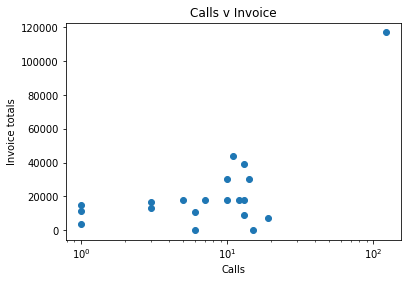

In [0]:
# Create data
x = calist
y = ntlist

# Plot
plt.scatter(x, y)
plt.title('Calls v Invoice')
plt.xlabel('Calls')
plt.ylabel('Invoice totals')
plt.xscale('log')
plt.show()

In [0]:
averages = []
for c in range(len(custs)):
  if tlist[c] == 'NA':
    a = 0
  else:
    a = int(tlist[c]) / int(calist[c])
    a = round(a, 2)
  averages.append(a)

fig = go.Figure(data=[
    go.Bar(name='Calls', x=custs, y=averages),
])

fig.show()

In [0]:
cn = [4, 5, 10, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 28, 34, 37, 39, 40, 41, 45]
lcn = [5, 16, 18, 19]
ncn= [20, 21, 24, 26, 40, 25]
lcnurls = ['https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_5.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_16.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_18.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_19.zip']
names = ['hs_customer_5.csv', 'hs_customer_16.csv', 'hs_customer_18.csv', 'hs_customer_19.csv']
rtlist = []
u = 0
for n in range(len(cn)):
  if cn[n] in ncn:
    rtlist.append('NA')
    continue
  elif cn[n] in lcn:
    url3 = urlopen(lcnurls[u])
    zipfile = ZipFile(BytesIO(url3.read()))
    df3 = pa.read_csv(zipfile.open(names[u]), dtype=object)
    u = u + 1
  else:
    url3 = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/hs_customer_'+str(cn[n])+'.csv'
    df3 = pa.read_csv(url3)

  invoiceid = set(df3['invoice_id'].values.tolist())
  visited = []
  invoices = df3['invoice_total'].values.tolist()
  r = 0

  total = 0
  did = []
  didnt = []

  for row in df3['invoice_id']:
    if str(row) not in visited:
      did.append(1)
      visited.append(str(row))
      if isinstance(invoices[r], str) == True:
        i = float(invoices[r])
      else:
        i = invoices[r]
      if math.isnan(i) == True:
        total = total + 0
      else:
        total = total + i
      r = r + 1
    else:
      didnt.append(1) 
      r = r + 1

  rtlist.append(round(total, 2))
  print('Customer '+str(cn[n])+' invoice total: '+str(round(total, 2)))

print(rtlist)

Customer 4 invoice total: 6393062.57
Customer 5 invoice total: 15634750.34
Customer 10 invoice total: 2646213.89
Customer 15 invoice total: 3674778.17
Customer 16 invoice total: 23066653.63
Customer 18 invoice total: 31766792.04
Customer 19 invoice total: 17028032.06
Customer 23 invoice total: 6562454.33
Customer 28 invoice total: 6300425.98
Customer 34 invoice total: 3788197.82
Customer 37 invoice total: 2265649.31
Customer 39 invoice total: 729041.88
Customer 41 invoice total: 4583307.18
Customer 45 invoice total: 2142129.89
[6393062.57, 15634750.34, 2646213.89, 3674778.17, 23066653.63, 31766792.04, 17028032.06, 'NA', 'NA', 6562454.33, 'NA', 'NA', 'NA', 6300425.98, 3788197.82, 2265649.31, 729041.88, 'NA', 4583307.18, 2142129.89]


In [0]:
rntlist = []
for t in range(len(rtlist)):
  if rtlist[t] == 'NA':
    nt = 0
    rntlist.append(nt)
  else:
    nt = rtlist[t]
    rntlist.append(nt)

fig = go.Figure(data=[
    go.Bar(name='Customer Invoice from CJ (in k)', x=custs, y=ntlist),
    go.Bar(name='Cumtomer Invoice totals (in 1,000k)', x=custs, y=rtlist)
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [0]:
print(len(rntlist))
print(len(ntlist))

20
20


In [0]:
fig = px.scatter(x=rntlist, y=ntlist, log_x = True, log_y=True, hover_data=[custs], labels={'x':'Customer Personal Invoice Total', 'y':'Customer Invoice Total from CJ'})

fig.show()

In [0]:
# Create data
x = calist
y = ntlist

# Plot
plt.scatter(x, y)
plt.title('Customer Invoiced from CJ v Customer')
plt.xlabel('Calls')
plt.ylabel('Invoice totals')
plt.xscale('log')
plt.show()